In [1]:
import sys

In [3]:
sys.version

'3.8.3 (default, Jul  2 2020, 11:26:31) \n[Clang 10.0.0 ]'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import sklearn.metrics as sm
import seaborn as sns

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/WidhyaOrg/datasets/master/bitcoin_dataset.csv')

In [3]:
data.head(2)

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0


In [4]:
data.shape

(2906, 24)

In [5]:
data.columns

Index(['Date', 'btc_market_price', 'btc_total_bitcoins', 'btc_market_cap',
       'btc_trade_volume', 'btc_blocks_size', 'btc_avg_block_size',
       'btc_n_orphaned_blocks', 'btc_n_transactions_per_block',
       'btc_median_confirmation_time', 'btc_hash_rate', 'btc_difficulty',
       'btc_miners_revenue', 'btc_transaction_fees',
       'btc_cost_per_transaction_percent', 'btc_cost_per_transaction',
       'btc_n_unique_addresses', 'btc_n_transactions',
       'btc_n_transactions_total', 'btc_n_transactions_excluding_popular',
       'btc_n_transactions_excluding_chains_longer_than_100',
       'btc_output_volume', 'btc_estimated_transaction_volume',
       'btc_estimated_transaction_volume_usd'],
      dtype='object')

In [6]:
data['btc_market_price'][1023]

13.6888

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:2264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


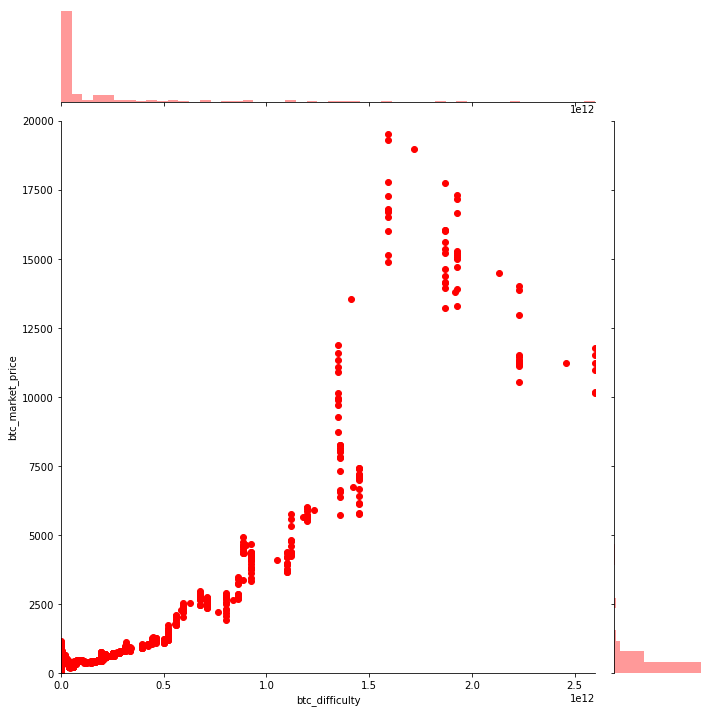

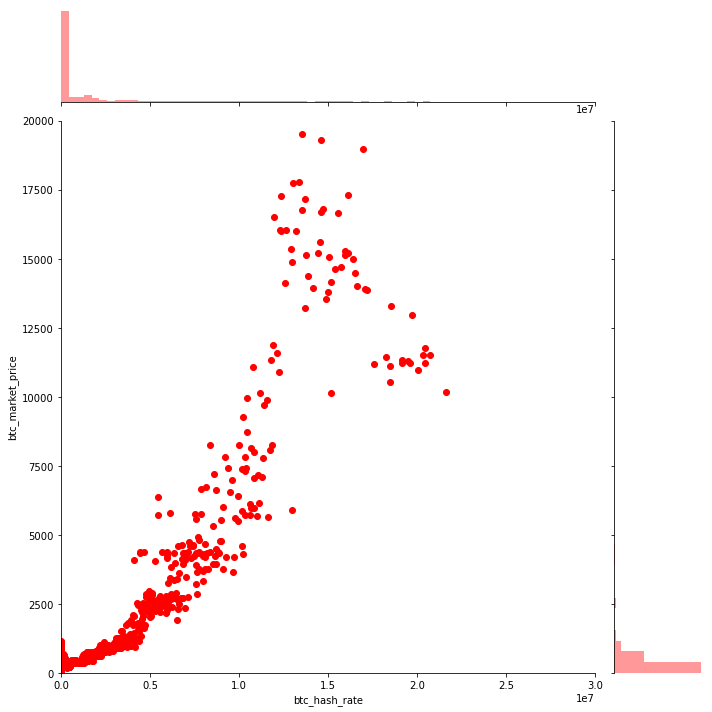

In [7]:
q=sns.jointplot("btc_difficulty","btc_market_price",data=data,xlim=(0,2.6E+12),ylim=(0,20000),color="r",size=10)
r=sns.jointplot("btc_hash_rate","btc_market_price",data=data,xlim=(0,30000000),ylim=(0,20000),color="r",size=10)



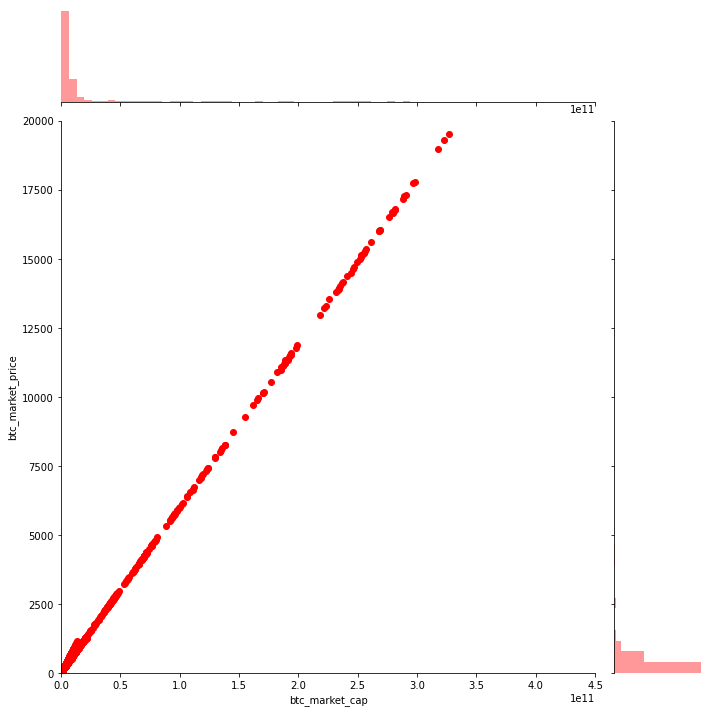

In [8]:
s=sns.jointplot("btc_market_cap","btc_market_price",data=data,xlim=(0,450000000000),ylim=(0,20000),color="r",size=10)



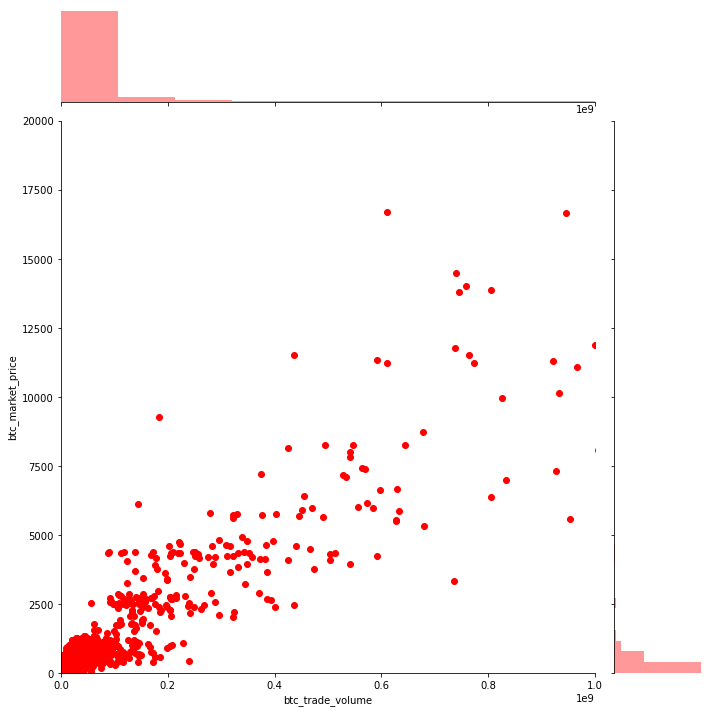

In [9]:
t=sns.jointplot("btc_trade_volume","btc_market_price",data=data,xlim=(0,1000000000),ylim=(0,20000),color="r",size=10)



In [10]:
data["btc_trade_volume"].isnull().values.any()

True

In [11]:
data["btc_trade_volume"].fillna(data["btc_trade_volume"].median(),inplace=True)
data["btc_transaction_fees"].fillna(data["btc_transaction_fees"].median(),inplace=True)
data["btc_difficulty"].fillna(data["btc_difficulty"].mean(),inplace=True)
data["btc_total_bitcoins"].fillna(data["btc_total_bitcoins"].mean(),inplace=True)
data["btc_total_bitcoins"].fillna(data["btc_total_bitcoins"].mean(),inplace=True)
data["btc_blocks_size"].fillna(data["btc_blocks_size"].mean(),inplace=True)
data["btc_blocks_size"].fillna(data["btc_blocks_size"].mean(),inplace=True)
data["btc_median_confirmation_time"].fillna(data["btc_median_confirmation_time"].mean(),inplace=True)





                               



In [12]:
data.isnull().sum()

Date                                                   0
btc_market_price                                       0
btc_total_bitcoins                                     0
btc_market_cap                                         0
btc_trade_volume                                       0
btc_blocks_size                                        0
btc_avg_block_size                                     0
btc_n_orphaned_blocks                                  0
btc_n_transactions_per_block                           0
btc_median_confirmation_time                           0
btc_hash_rate                                          0
btc_difficulty                                         0
btc_miners_revenue                                     0
btc_transaction_fees                                   0
btc_cost_per_transaction_percent                       0
btc_cost_per_transaction                               0
btc_n_unique_addresses                                 0
btc_n_transactions             

In [13]:
data["btc_trade_volume"].isnull().values.any()

False

In [16]:
model = smf.ols(formula='btc_market_price ~ btc_market_cap + btc_n_transactions + btc_miners_revenue + btc_cost_per_transaction + btc_difficulty + btc_hash_rate + btc_cost_per_transaction_percent', data=data).fit()

In [17]:
y = model.predict(data[['btc_market_cap','btc_cost_per_transaction_percent','btc_n_transactions','btc_miners_revenue','btc_cost_per_transaction','btc_difficulty','btc_hash_rate']])

print("MSE:", sm.mean_squared_error(y, data['btc_market_price'].values))

MSE: 406.61432917838283


In [18]:

test = pd.read_csv('https://raw.githubusercontent.com/colaberry/data/master/Bitcoin/test_set.csv')

test_predict = model.predict(test[['btc_market_cap','btc_cost_per_transaction_percent','btc_n_transactions','btc_miners_revenue','btc_cost_per_transaction','btc_difficulty','btc_hash_rate']])

for i in range(0,len(test_predict)):
    print("The price on "+ str(i+1) +" february is "+ str(test_predict[i]))

The price on 1 february is 9058.088237356822
The price on 2 february is 8899.085658391417
The price on 3 february is 9119.843047950399
The price on 4 february is 8466.687255799776
The price on 5 february is 6800.753792822619
The price on 6 february is 7625.499113947569
The price on 7 february is 8072.405387699048
The price on 8 february is 8259.810369266783
The price on 9 february is 8557.971719992696
The price on 10 february is 8334.015253649877
The price on 11 february is 8425.712247313884
The price on 12 february is 8836.588495890255
The price on 13 february is 8623.849963355166
The price on 14 february is 9363.419948747653
